# Movie based on interactively set key-frames

Guillaume Witz, Science IT Support, Microscopy Imaging Center, Bern University

## Load packages and data

In [5]:
import numpy as np
import skimage.io
import napari
from naparimovie import Movie
%run 'download.py'
%gui qt5

In [6]:
image = skimage.io.imread('Sample/mitosis.tif',plugin='tifffile')

## Setting key-frames

First we create a napari view of our data:

In [7]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_image(image[:,:,0,:,:], scale=(5,1,1),colormap = 'cyan')
viewer.add_image(image[:,:,1,:,:], scale=(5,1,1), blending = 'additive', colormap = 'magenta');

Then we create a ```Movie``` object that will allow us to create and handle key-frames of the movie. To create this object we use the napari ```viewer``` object that it will be applied to:

In [8]:
movie = Movie(myviewer=viewer)

Finally, when the napari window is in the foreground, we can now use a set of key-based commands to create and modify key-frames. Those key-frames are then interpolated to create a smooth movie. For each key-frame the following properties can be changed:

- object rotation
- object displacement
- time frame
- field of view
- visibility of different layers

The following keys can be used to handle key-frames:

- f : set current view as key-frame. The key-frame is added right after the current key-frame. If you move between key-frames using a,b (see below) this allows you to insert key-frames at specific positions
- r : replace current key-frame with adjusted view
- d : delete current key-frame
- a : go to next key-frame
- b : go to previous key-frame
- w : go through interpolated key-frames

## Save movie

Adjust the number of interpolated frames between key-frames. To check if it's ok, you can use the ```w``` key to progress through the movie.

In [12]:
movie.inter_steps = 15

Finally save the movie. You can pick a name (or path), the resolution in dpi and the number of frames per second.

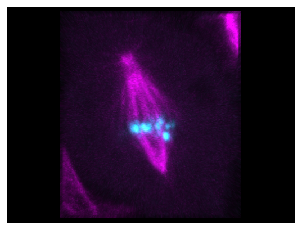

In [13]:
movie.make_movie(name = 'movie_interactive.mp4', resolution = 300, fps = 20)

You can also save your movie as a gif:

In [14]:
movie.make_gif('gif_interactive.gif')